Get images

In [1]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
#path='E:/ISIC DATA'
path='E:/Desktop/snip'
trainingpath='E:/Training'

In [2]:
import pickle
name="isic_data"
df=pickle.load(open(name,"rb"))

In [3]:
import cv2

In [4]:
filelist=os.listdir(path)
meta=[file for file in filelist if not file.endswith(".jpeg") and not file.endswith(".png") and file.startswith("ISIC")]
pics=[file for file in filelist if (file.endswith(".jpeg") or file.endswith(".png")) and file.startswith("ISIC")]

In [145]:
symmetry_dict=dict()
color_dict=dict()
border_dict=dict()

In [6]:
len(pics)

166

In [7]:
i=0

In [119]:
imgname=pics[i]
filename=path+'/'+pics[i]

In [120]:
orig_img=cv2.imread(filename, cv2.IMREAD_COLOR)
img=orig_img

normalize image

In [121]:
norm_image = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

In [122]:
img=norm_image

split image into RGB channels

In [123]:
def split_into_rgb_channels(image):
    """Split the target image into its red, green and blue channels.image - a numpy array of shape (rows, columns, 3).
    output - three numpy arrays of shape (rows, columns) and dtype same as
    image, containing the corresponding channels.
    """
    red = image[:,:,2]
    green = image[:,:,1]
    blue = image[:,:,0]
    return red, green, blue

E:/Desktop/snip/ISIC_0000006.jpeg


(<matplotlib.axes._subplots.AxesSubplot at 0x2de0d8e44a8>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 Text(0.5,1,'red'))

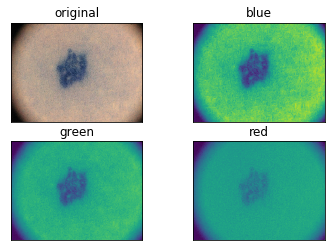

In [124]:
r,g,b=split_into_rgb_channels(img)
print(filename)
plt.subplot(2,2,1),plt.imshow(img),plt.xticks([]),plt.yticks([]),plt.title('original')
plt.subplot(2,2,2),plt.imshow(b),plt.xticks([]),plt.yticks([]),plt.title('blue')
plt.subplot(2,2,3),plt.imshow(g),plt.xticks([]),plt.yticks([]),plt.title('green')
plt.subplot(2,2,4),plt.imshow(r),plt.xticks([]),plt.yticks([]),plt.title('red')

reduce noise

In [125]:
# Do some denoising on blue channel because that usually gives best contrast
gaussian = cv2.GaussianBlur(b,(3,3),0)

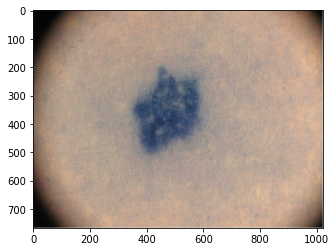

In [126]:
colorgaussian=cv2.GaussianBlur(img,(3,3),0)
plt.imshow(colorgaussian)

(<matplotlib.axes._subplots.AxesSubplot at 0x2de0f740710>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 Text(0.5,1,'gaussian'))

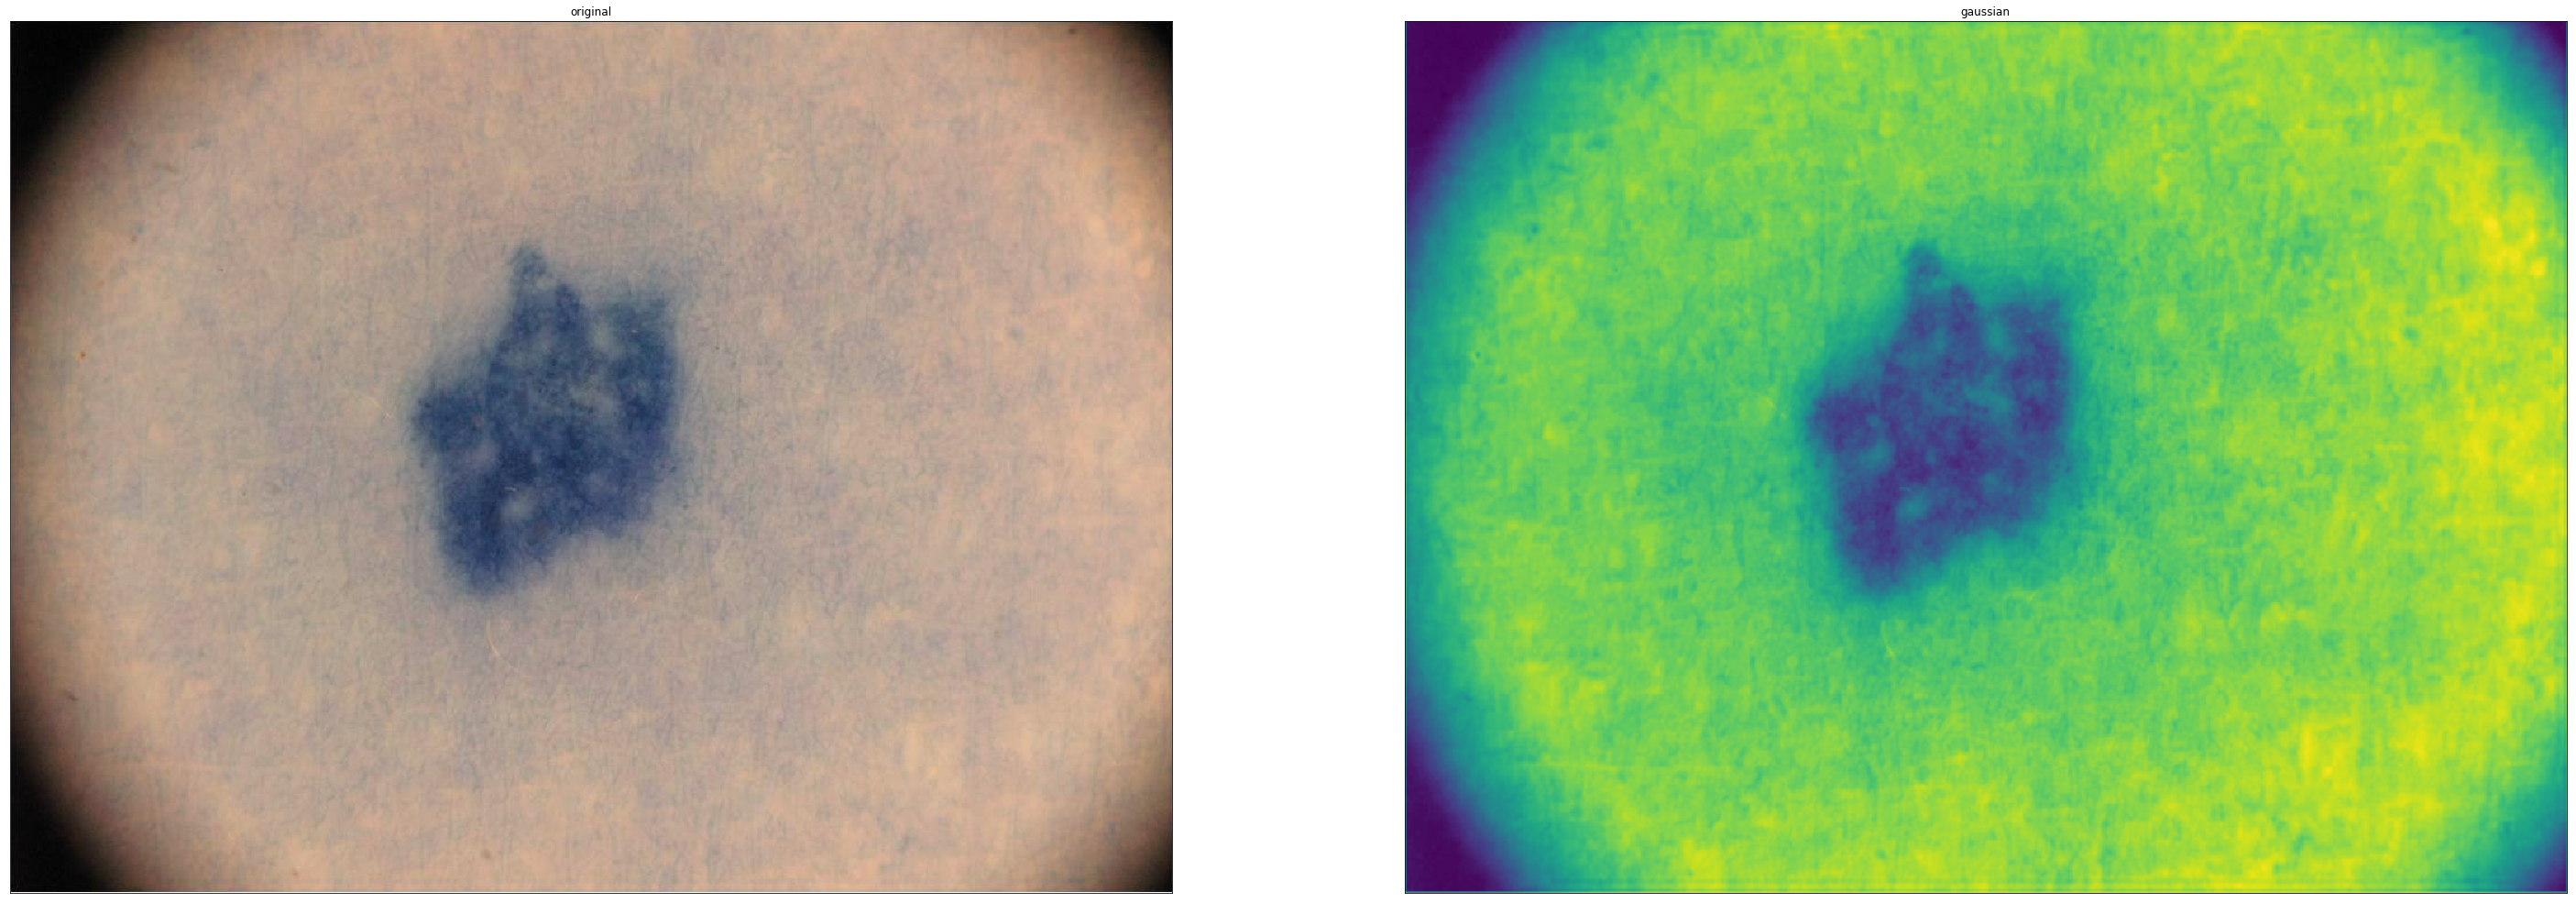

In [127]:
plt.figure(figsize = (50,30))
plt.subplot(1,2,1),plt.imshow(img),plt.xticks([]),plt.yticks([]),plt.title('original')
plt.subplot(1,2,2),plt.imshow(gaussian),plt.xticks([]),plt.yticks([]),plt.title('gaussian')

find edge & image segmentation

## TRY DEEP LEARNING TOOL FOR THIS

(<matplotlib.axes._subplots.AxesSubplot at 0x2de0f7ec978>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 Text(0.5,1,'only roi'))

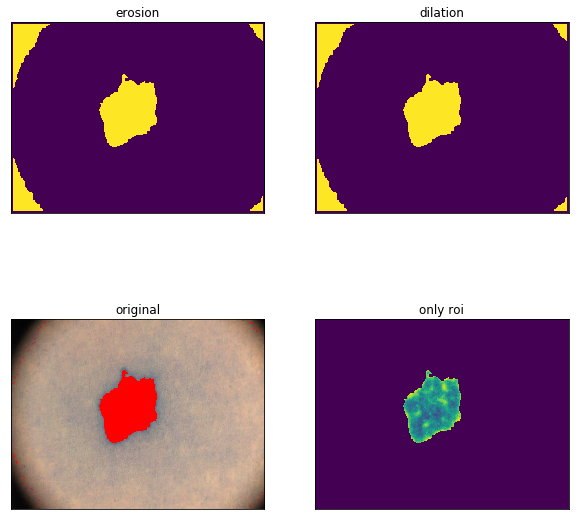

In [128]:
import cv2
import numpy as np
fig,ax =plt.subplots(figsize = (10,10))
#R,G,B=split_into_rgb_channels(img)


kernel = np.ones((5,5),np.uint8)
#gray = cv2.cvtColor(gaussian, cv2.COLOR_RGB2GRAY)
th, threshed = cv2.threshold(gaussian, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
erosion = cv2.erode(threshed,kernel,iterations = 3)
dilation = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel)
plt.subplot(2,2,1),plt.imshow(erosion),plt.xticks([]),plt.yticks([]),plt.title('erosion')
plt.subplot(2,2,2),plt.imshow(dilation),plt.xticks([]),plt.yticks([]),plt.title('dilation')
## Find the first contour that greate than 100, locate in centeral region
## Adjust the parameter when necessary
cnts, hierarchy=cv2.findContours(erosion,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE )
cnts = sorted(cnts, key=cv2.contourArea)
H,W = img.shape[:2]
maxContour = 0


for contour in cnts:
    cv2.drawContours(img,contour,-1,(255,0,0),-1)
    contourSize = cv2.contourArea(contour)
    if contourSize > maxContour:
        maxContour = contourSize
        maxContourData = contour
    #if contour
cv2.drawContours(img,[contour],-1,(255,0,0),-1)
## Create mask and do bitwise-op
mask = np.zeros(img.shape[:2],np.uint8)
cv2.drawContours(mask, [contour],-1, 255, -1)
#area = cv2.contourArea(contour)
dst = cv2.bitwise_and(gaussian, gaussian, mask=mask)
plt.subplot(2,2,3),plt.imshow(img),plt.xticks([]),plt.yticks([]),plt.title('original')
plt.subplot(2,2,4),plt.imshow(dst),plt.xticks([]),plt.yticks([]),plt.title('only roi')

(<matplotlib.axes._subplots.AxesSubplot at 0x2de0f890e48>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 Text(0.5,1,'only roi'))

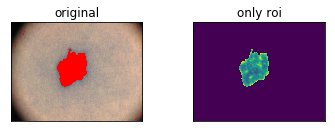

In [129]:
for contour in cnts:
    cv2.drawContours(img,contour,-1,(255,0,0),-1)
    contourSize = cv2.contourArea(contour)
    if contourSize > maxContour:
        maxContour = contourSize
        maxContourData = contour
    #if contour
cv2.drawContours(img,[contour],-1,(255,0,0),-1)
## Create mask and do bitwise-op
mask = np.zeros(img.shape[:2],np.uint8)
cv2.drawContours(mask, [contour],-1, 255, -1)
#area = cv2.contourArea(contour)
dst = cv2.bitwise_and(gaussian, gaussian, mask=mask)
plt.subplot(2,2,3),plt.imshow(img),plt.xticks([]),plt.yticks([]),plt.title('original')
plt.subplot(2,2,4),plt.imshow(dst),plt.xticks([]),plt.yticks([]),plt.title('only roi')

In [130]:
fourcorners=[(0,0),(img.shape[:2][1]-1,0),(0,img.shape[:2][0]-1),(img.shape[:2][1]-1,img.shape[:2][0]-1)]

In [131]:
orig_cnts=cnts
new_cnts=list()
for con in range(len(cnts)):
    contour=cnts[con]
    bunch=[tuple(contour[num][0]) for num in range(len(contour))]
    y_min=min(bunch, key=lambda t: t[0])[0]
    y_max=max(bunch, key=lambda t: t[0])[0]
    x_min=min(bunch, key=lambda t: t[1])[1]
    x_max=max(bunch, key=lambda t: t[1])[1]
    
    y_count=0
    x_count=0

    for num in bunch:
        if num[0]==x_min:
            x_count=x_count+1
        if num[0]==x_max:
            x_count=x_count+1
        if num[1]==y_min:
            y_count=y_count+1
        if num[1]==y_max:
            y_count=y_count+1
    if (x_count>round(img.shape[:2][0]*0.6)) or (y_count>round(img.shape[:2][1]*0.6)):
        #new_cnts.append(cnts[con])
        cnts.pop(con)

(<matplotlib.axes._subplots.AxesSubplot at 0x2de0f793e48>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 Text(0.5,1,'only roi'))

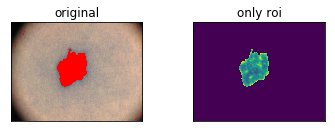

In [132]:
#retread to check if there are removed contour
for contour in cnts:
    cv2.drawContours(img,contour,-1,(255,0,0),-1)
    contourSize = cv2.contourArea(contour)
    if contourSize > maxContour:
        maxContour = contourSize
        maxContourData = contour
    #if contour
cv2.drawContours(img,[contour],-1,(255,0,0),-1)
## Create mask and do bitwise-op
mask = np.zeros(img.shape[:2],np.uint8)
cv2.drawContours(mask, [contour],-1, 255, -1)
#area = cv2.contourArea(contour)
dst = cv2.bitwise_and(gaussian, gaussian, mask=mask)
plt.subplot(2,2,3),plt.imshow(img),plt.xticks([]),plt.yticks([]),plt.title('original')
plt.subplot(2,2,4),plt.imshow(dst),plt.xticks([]),plt.yticks([]),plt.title('only roi')

Check for symmetry: bigger value more malignant

In [133]:
# get angle and center for rotation
(a,b),(MA,ma),angle = cv2.fitEllipse(maxContourData)
print(a,b,MA,ma,angle)
a=int(a)
b=int(b)

474.31097412109375 358.281005859375 213.0989227294922 281.885009765625 29.105783462524414


In [134]:
def rotate_bound(image, angle,cX,cY):
    # grab the dimensions of the image
    (h, w) = image.shape[:2] 
    # grab the rotation matrix, then grab the sine and cosine
    # (i.e., the rotation components of the matrix)
    M = cv2.getRotationMatrix2D((cX, cY), angle, 1.0)
    cos = np.abs(M[0, 0])
    sin = np.abs(M[0, 1])
 
    # compute the new bounding dimensions of the image
    nW = int((h * sin) + (w * cos))
    nH = int((h * cos) + (w * sin))
 
    # adjust the rotation matrix to take into account translation
    M[0, 2] += (nW / 2) - cX
    M[1, 2] += (nH / 2) - cY
 
    # perform the actual rotation and return the image
    return cv2.warpAffine(image, M, (nW, nH))

In [135]:
rotated_roi=rotate_bound(dst,angle,a,b)

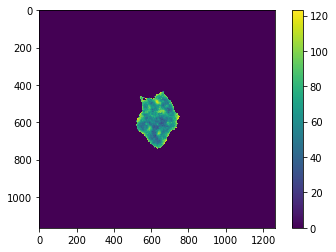

In [136]:
plt.imshow(rotated_roi)
plt.colorbar()

In [137]:
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
    err /= float(maxContour)
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

(<matplotlib.axes._subplots.AxesSubplot at 0x2de15a62f60>,
 Text(0.5,1,'UD symmetry'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

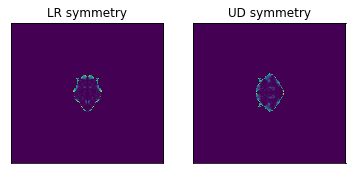

In [138]:
from mpl_toolkits.axes_grid1 import AxesGrid

imageO=rotated_roi
imageLR=np.fliplr(rotated_roi)
imageUD=np.flipud(rotated_roi)
plt.subplot(1,2,1),plt.imshow((imageO.astype("float")-imageLR.astype("float"))**2),plt.title('LR symmetry'),plt.xticks([]),plt.yticks([])
plt.subplot(1,2,2),plt.imshow((imageO.astype("float")-imageUD.astype("float"))**2),plt.title('UD symmetry'),plt.xticks([]),plt.yticks([])

In [139]:
lr=mse(rotated_roi, np.fliplr(rotated_roi))
ud=mse(rotated_roi, np.flipud(rotated_roi))

In [140]:
print((lr+ud)/2)

1859.872863993516


In [141]:
symmetry_dict[imgname]=(lr+ud)/2

Check Color: bigger value more malignant

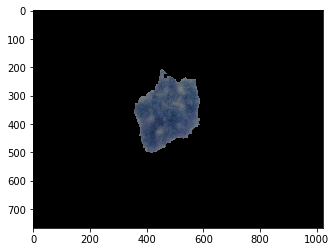

In [142]:
colorcheck = cv2.bitwise_and(orig_img, orig_img, mask=mask)
plt.imshow(colorcheck)

303.74203
342.00305
441.53403


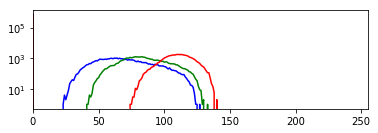

<class 'list'>
[[303.74203, 'b'], [342.00305, 'g'], [441.53403, 'r']]


In [143]:
color = ('b','g','r')
fig=plt.figure()
zerovalues=list()
ax=fig.add_subplot(2,1,1)
std_list=[]
for i,col in enumerate(color):
    histr = cv2.calcHist([colorcheck],[i],None,[256],[0,256])
    ax.plot(histr,color = col)
    zerovalues.append(histr[0])
    histr=histr[1:]
    plt.xlim([0,255])
    ax.set_yscale('log')
    std_list.append([histr.std(),col])
    print(histr.std())
plt.show()
zerovalues
print(type(std_list))
print(std_list)

In [114]:
color_dict[imgname]=std_list

TypeError: 'tuple' object does not support item assignment

Check border

In [115]:
def get_mag_ang(img):

    """
    Gets image gradient (magnitude) and orientation (angle)

    Args:
        img

    Returns:
        Gradient, orientation
    """

    img = np.sqrt(img)

    gx = cv2.Sobel(np.float32(img), cv2.CV_32F, 1, 0)
    gy = cv2.Sobel(np.float32(img), cv2.CV_32F, 0, 1)

    mag, ang = cv2.cartToPolar(gx, gy)

    return mag, ang, gx, gy 

In [146]:
h=20; w=20
tots_gradient=[]
for point in maxContourData[:,0]:
    x=point[0]
    y=point[1]
    #print(x,y)
    y1=y-h; y2=y+h
    x1=x-w; x2=x+w
    if y1<0:
        y1=0
    if y2>H:
        y2=H
    if x1<0:
        x1=0
    if x2>W:
        x2=W
    #print(x1,y1,x2,y2)
    crop_img = orig_img[:,:,0][y1:y2, x1:x2].copy()
    mag,ang,gx,gy=get_mag_ang(crop_img)
    tots_gradient.append(mag.mean())

border_dict[imgname]=np.mean(tots_gradient)

In [117]:
i=i+1

In [118]:
print(symmetry,border)

{'ISIC_0000000.jpeg': 2139.2244858779122, 'ISIC_0000006.jpeg': 1859.872863993516, 'ISIC_0000007.jpeg': 1430.1804769531946} {'ISIC_0000000.jpeg': 1.0719731, 'ISIC_0000006.jpeg': 1.350611, 'ISIC_0000007.jpeg': 1.3120295}


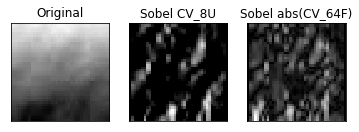

In [100]:
img=crop_img
# Output dtype = cv.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
# Output dtype = cv.CV_64F. Then take its absolute and convert to cv.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()

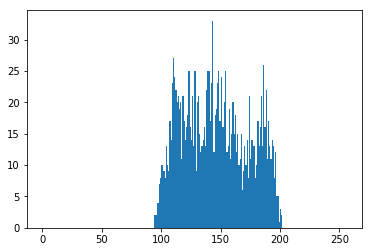

In [94]:
plt.hist(crop_img.ravel(),256,[0,256]); plt.show()

Check hough circle

In [37]:
variance_of_laplacian(img)

114.58068710937499

In [56]:
print(H)

767


In [55]:
len(maxContourData)

2926

In [442]:
perimeter = cv2.arcLength(maxContourData,True)
print(perimeter)
print(W)

4119.329200387001
1504


In [ ]:
contour_list = []
for contour in cnts:
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    if ((len(approx) > 8) & (area > 30) ):
        contour_list.append(contour)

In [ ]:
contour_list

In [ ]:
cv2.drawContours(img, contour_list,  -1, (255,0,0), 2)
plt.imshow(img)

In [419]:
img_size=height*width
np.sum(dst)/img_size

179.28548210554248

In [420]:
dst.shape[1]

1022

In [421]:
np.size(img)

2351622

In [422]:
np.size(dst)

2351622

In [423]:
_, contours, hierarchy = cv2.findContours(dst, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

contour_list = []
for contour in contours:
    approx = cv2.approxPolyDP(contour,0.01*cv2.arcLength(contour,True),True)
    area = cv2.contourArea(contour)
    if ((len(approx) > 8) & (len(approx) < 23) & (area > 30) ):
        contour_list.append(contour)

cv2.drawContours(dst, contour_list,  -1, (255,0,0), 2)
plt.imshow(raw_image)


error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\imgproc\src\contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


In [433]:
print(lr,ud)

7550.76974377461 7470.474114025845


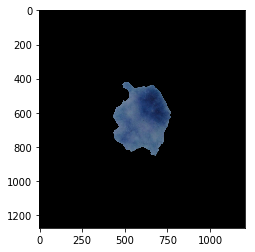

In [301]:
plt.imshow(np.fliplr(rotated_roi))

(<matplotlib.axes._subplots.AxesSubplot at 0x2a890a951d0>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>),
 Text(0.5,1,'center on ROI'))

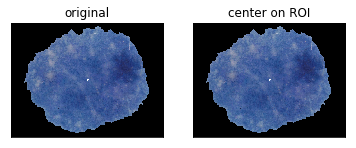

In [48]:
#find the center of the blob
M=cv2.moments(contour)
cX = int(M["m10"] / M["m00"])
cY = int(M["m01"] / M["m00"])
dst_mark_center=dst
cv2.circle(dst_mark_center,(cX,cY), 7,(255,255,255),-1)
plt.subplot(1,2,1),plt.imshow(dst),plt.xticks([]),plt.yticks([]),plt.title('original')
plt.subplot(1,2,2),plt.imshow(dst_mark_center),plt.xticks([]),plt.yticks([]),plt.title('center on ROI')

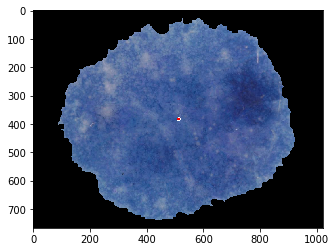

In [15]:
plt.imshow(dst)

In [17]:
import math
slope=math.tan(np.deg2rad(angle))

In [18]:
temp=list()
temp2=list()
for s in contour:
    x=s[0][0]
    y=s[0][1]
    if slope*(x-a)-y+b<0:
        temp.append((x,y))
    elif slope*(x-a)-y+b>0:
        temp2.append((x,y))

In [19]:
temparray=np.array(temp)
temp2array=np.array(temp2)

In [53]:
height, width = img.shape[:2]
rotation_matrix=cv2.getRotationMatrix2D((a,b),angle,2)
dst_warp=cv2.warpAffine(dst,rotation_matrix,(height,width))

TypeError: only size-1 arrays can be converted to Python scalars

In [31]:
len(img)

767

In [ ]:
dst4=dst
cv2.drawContours(dst4, [temp2array],-1, 0, -1)
plt.imshow(dst4)

In [ ]:
def rotateImage(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result

In [ ]:
plt.imshow(rotateImage(dst3,180))

In [ ]:
out = rotateImage(dst4,180) * 0.5 + dst4 * 0.5

In [ ]:
plt.imshow(out)

In [ ]:
x=list()
for s in contour:
    x.append(s[0][0])
x=np.array(list(set(x)))
y=slope*x-slope*b+a

In [ ]:
maxx=max(x)
maxy=slope*x-slope*b+a
minx=min(x)
miny=slope*x-slope*b+a

In [ ]:
maxx

In [104]:
img=cv2.line(dst,(maxx,maxy),(minx,miny),(255,255,255),5)

TypeError: only size-1 arrays can be converted to Python scalars

In [125]:
contour[0]

array([985, 490], dtype=int32)

In [51]:
type(contour[1][0])

numpy.int32

In [34]:
print(dst)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [19]:
print(angle)

158.32879638671875


In [18]:
height, width = dst.shape[:2]
crop_length=min(height,width)
height_start=(height)

In [ ]:
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(contour, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
img2 = cv2.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)

[vx,vy,x,y] = cv2.fitLine(contour, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
img3 = cv2.line(img2,(lefty,0),(righty,cols-1),(0,255,0),2)

plt.imshow(img3)

Image Segmentation for Asymmetry analysis

def variance_of_laplacian(image):
    # compute the Laplacian of the image and then return the focus
    # measure, which is simply the variance of the Laplacian
    return cv2.Laplacian(image, cv2.CV_64F).var()

#%% loop over the input images
threshold = 200
blurry=list()
for file_name in pics:
    image_path = path+'/'+file_name
    image = cv2.imread(image_path) # load the image
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert to grayscale
    fm = variance_of_laplacian(image) # calculate blur
    
    # if the focus measure is less than the supplied threshold,
    # then the image should be considered "blurry"
    if fm >= threshold:
        blur_image=(file_name,fm)
        blurry.append(blur_image)
        print("Blurry")